In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import measure
from skimage import segmentation
import cv2
import numpy as np
from skimage.filters import gaussian

In [ ]:
path="dataUNO.xlsx"
data=pd.read_excel(path,header=0,index_col=0)
data=data.values
# TAMAÑO: 72,104,48,3
data=data.reshape((72,104,48,3))

In [ ]:
print(data.shape)
print(data.values)


(72, 14976)
[[ 54  58 116 ...  63  94  39]
 [ 60  82  23 ...  71  82 126]
 [ 69  77 154 ...  25  32  47]
 ...
 [ 57  69 141 ...  18  22  13]
 [ 55  62 131 ...  41  64  38]
 [ 59  69 133 ...  62  94  53]]


(72, 104, 48, 3)


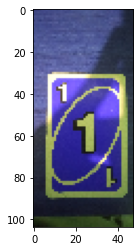

In [ ]:
# print(type())

print(data.shape)
plt.imshow(data[0,:,:,:])

In [ ]:
img=data[0,:,:,:]
# imgB=(img[:,:,0].astype(float))/255
# cont=measure.find_contours(imgB,0.4)
# plt.imshow(imgB,cmap='gray')

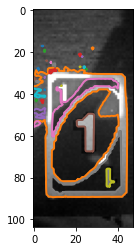

In [ ]:
fig, ax = plt.subplots()
ax.imshow(imgB, cmap=plt.cm.gray)
for contour in cont:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

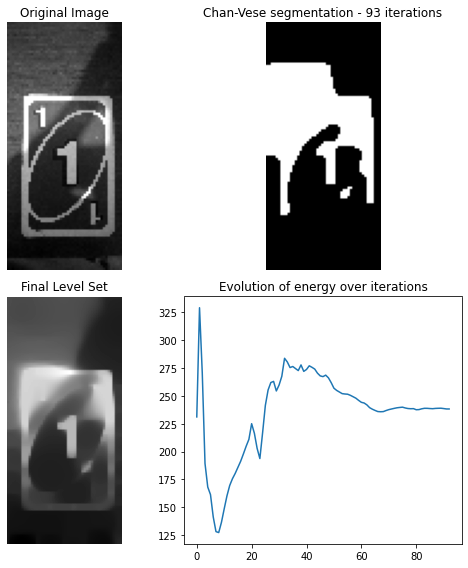

In [ ]:
imgB=img[:,:,0].astype(float)
cv = segmentation.chan_vese(imgB, mu=0.25, lambda1=1, lambda2=1, tol=1e-3,
               max_iter=200, dt=0.5, init_level_set="checkerboard",
               extended_output=True)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(imgB, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = f'Chan-Vese segmentation - {len(cv[2])} iterations'
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [ ]:
img.shape

(104, 48, 3)

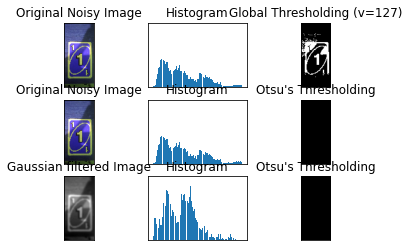

In [ ]:
# imgB=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=data[0,:,:,:].astype('uint8')
imgB=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret1,th1 = cv2.threshold(imgB,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(imgB,0,255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)
# ret2,th2 = cv2.threshold(imgB,0,255,)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(imgB,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

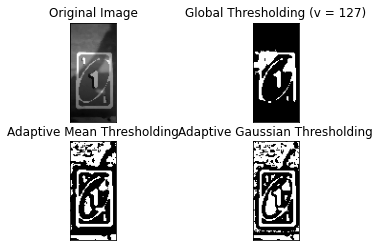

In [ ]:
img = cv2.medianBlur(imgB,3)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
from skimage.filters import median, gaussian, threshold_otsu, sobel
from skimage.morphology import binary_erosion

img=data[0,:,:,:].astype('uint8')
imgG=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)/255
# print(np.max(imgG))

gauss = gaussian(imgG, sigma=3)

SE = np.ones((7,7))
med = median(gauss, selem=SE)

edges = sobel(med)
edges2 = sobel(imgG)


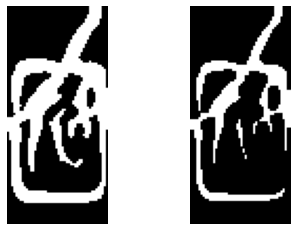

In [ ]:
thresh = threshold_otsu(edges)
# print(thresh)
binary = edges > thresh

SE2 = np.ones((3,3))
result = binary_erosion(binary, selem=SE2)

plt.subplot(121)
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(result, cmap='gray')
# plt.imshow(thresh)
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


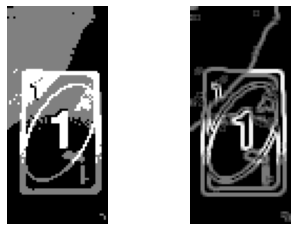

In [ ]:
from skimage.filters import threshold_multiotsu,sobel_h,sobel_v,scharr,sato,roberts,prewitt,threshold_local
from skimage.color import label2rgb
thresholds = threshold_multiotsu(imgG)
binarizada=image > threshold_local(image, 15, 'mean')
regions = np.digitize(imgG, bins=thresholds)
regions_colorized = label2rgb(regions)
bordes=prewitt(regions)

plt.subplot(121)
plt.imshow(regions, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(bordes, cmap='gray')
plt.axis('off')
plt.show()

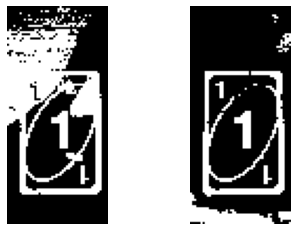

In [ ]:
from skimage.filters import threshold_local,threshold_li,median
from skimage.morphology import disk
from skimage.exposure import equalize_hist

imgEq=equalize_hist(imgG)
binarizada=imgG > threshold_li(imgEq)
# fmed=median(imgG,disk())
binarizada1=imgG > threshold_local(imgG, 15, 'mean')
binarizada2=imgG > threshold_local(imgEq, 15, 'mean')
plt.subplot(121)
plt.imshow(binarizada, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(binarizada2, cmap='gray')
plt.axis('off')
plt.show()

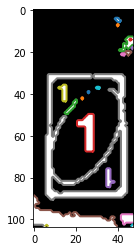

In [ ]:
from skimage.measure import find_contours
contours = find_contours(binarizada2)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(binarizada2, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

# print(contours)

Number of coordinates: 191 7 5


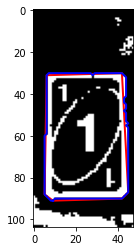

In [ ]:
from skimage.measure import approximate_polygon
plt.imshow(binarizada2,cmap='gray')

# approximate / simplify coordinates of the two ellipses
# for contour in find_contours(binarizada2, 0):
contour=find_contours(binarizada2, 0)[6]
coords = approximate_polygon(contour, tolerance=2.5)
plt.plot(coords[:, 1], coords[:, 0], '-r', linewidth=2)
coords2 = approximate_polygon(contour,4)
# plt.plot(coords2[:, 1], coords2[:, 0], '-g', linewidth=2)
# ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.plot(contour[:, 1], contour[:, 0], '-b', linewidth=2)
print("Number of coordinates:", len(contour), len(coords), len(coords2))
    # break

[ 9.  5.  6. 42. 45. 42.  9.]
(104, 48)
(104, 48, 3)


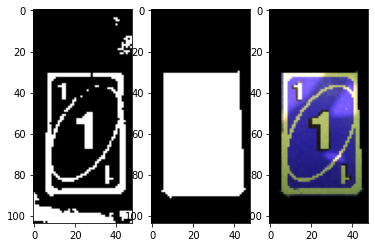

In [ ]:
from skimage.draw import polygon
from skimage.util import img_as_float
import numpy as np
print(coords[:, 1])
rr, cc = polygon(coords[:, 0], coords[:, 1])
poligono=np.zeros_like(imgG)
print(poligono.shape)
poligono[rr, cc] = 1
plt.subplot(131)
plt.imshow(binarizada2,cmap='gray')
plt.subplot(132)
plt.imshow(poligono,cmap='gray')
plt.subplot(133)
a=np.dstack([poligono]*3)
print(a.shape)
plt.imshow(a*img_as_float(img))

In [ ]:
np.max(a*img_as_float(img))

1.0

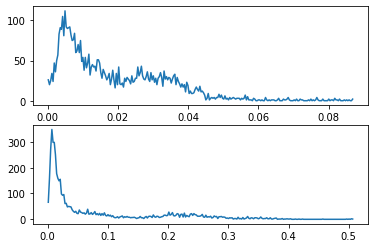

In [ ]:
from skimage import data, exposure, img_as_float
np_=np.histogram(imgG, bins=10)
sk1=exposure.histogram(edges)
sk2=exposure.histogram(edges2)
# print(np_)
# print((sk_))
plt.subplot(211)
plt.plot(sk1[1],sk1[0])
plt.subplot(212)
plt.plot(sk2[1],sk2[0])

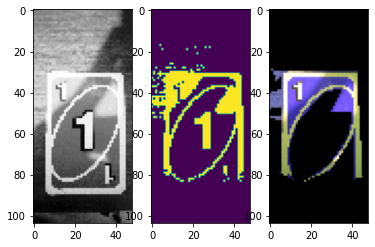

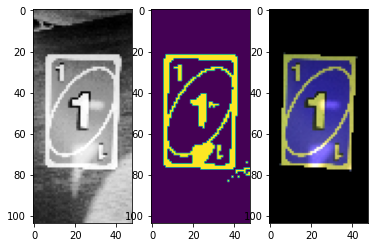

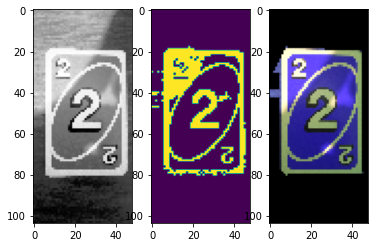

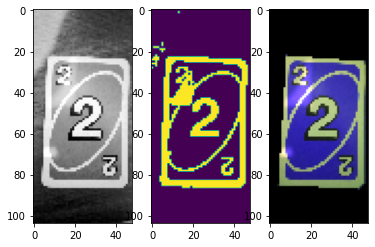

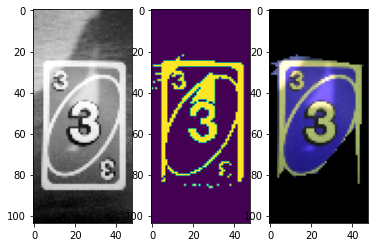

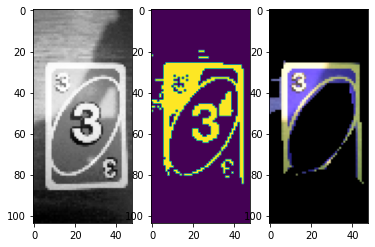

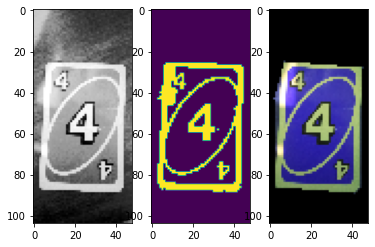

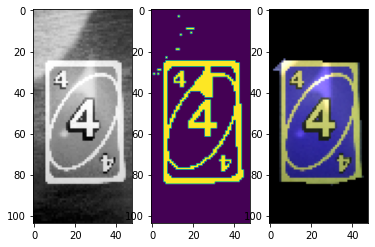

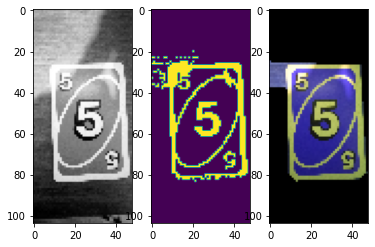

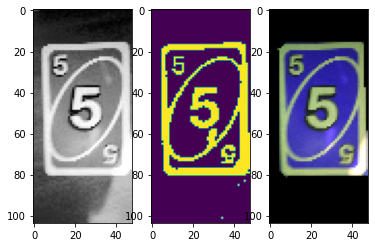

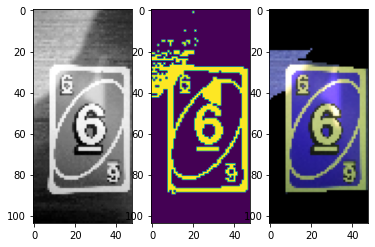

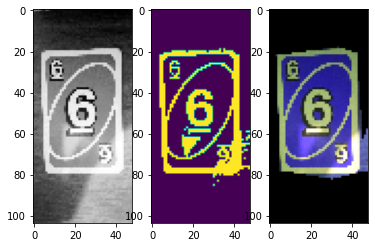

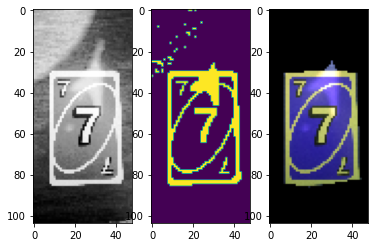

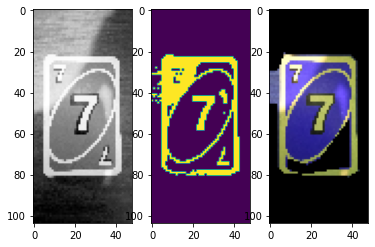

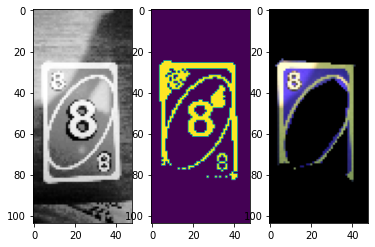

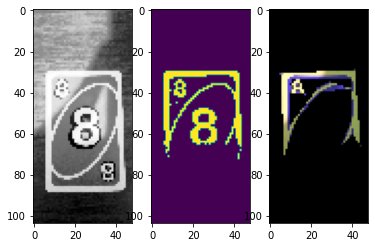

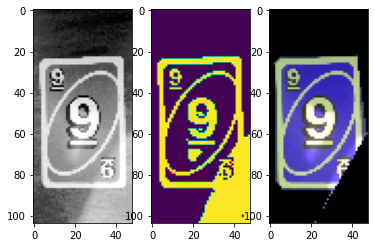

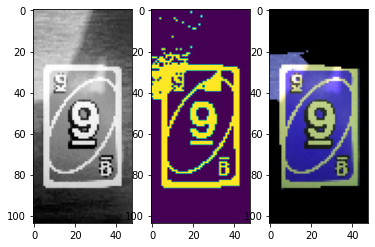

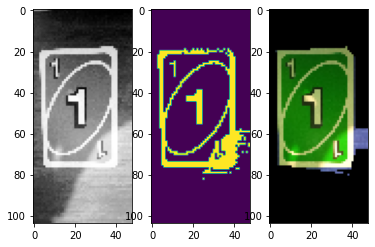

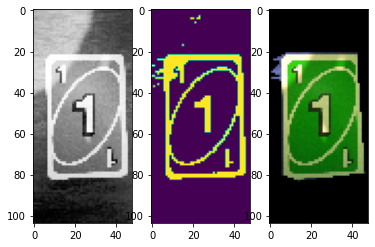

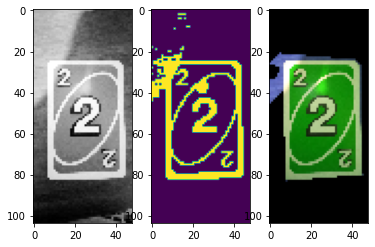

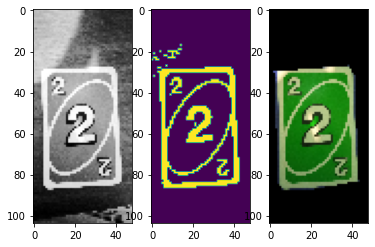

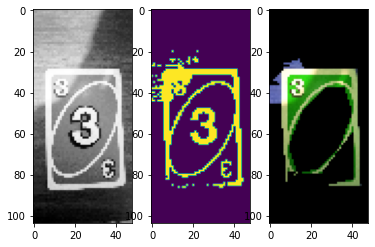

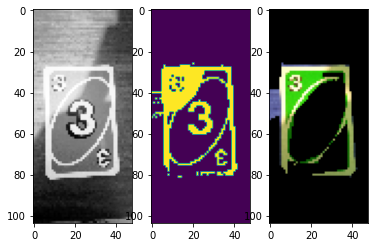

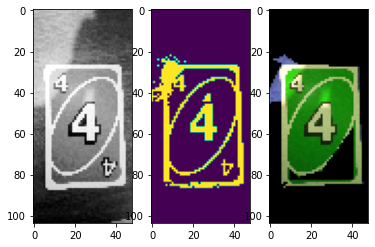

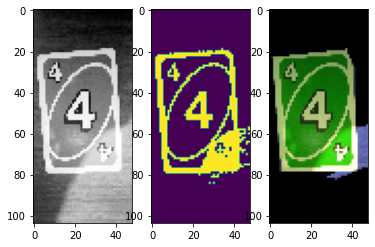

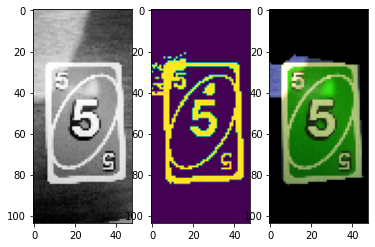

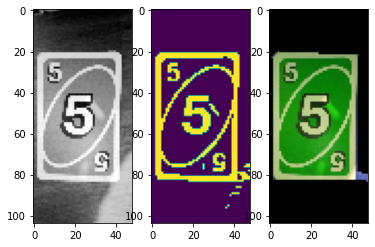

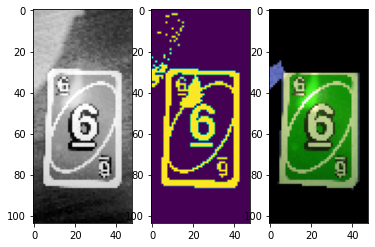

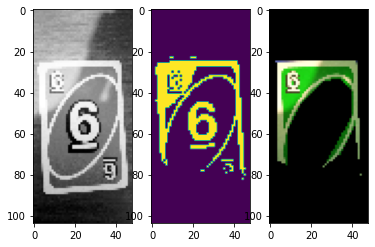

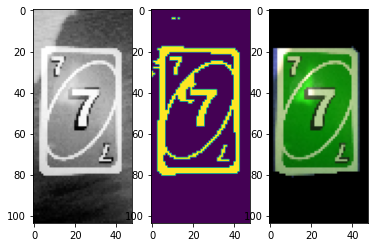

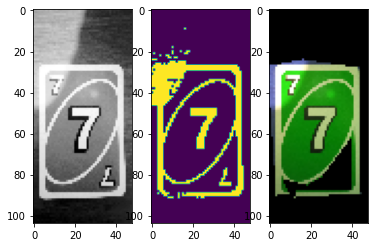

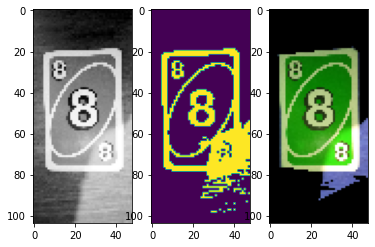

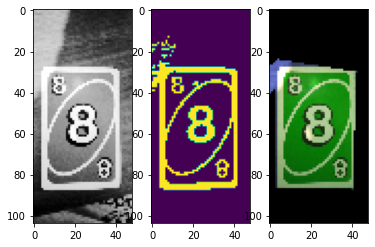

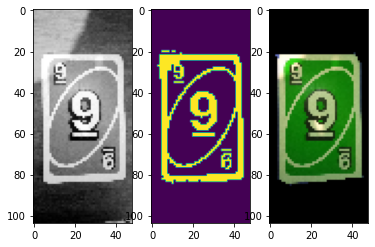

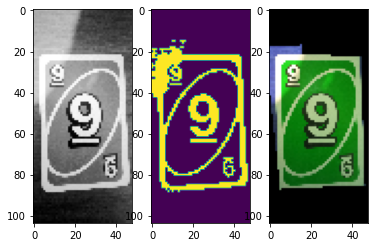

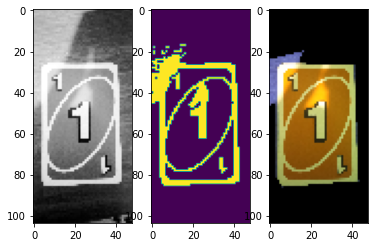

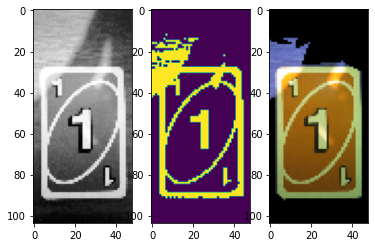

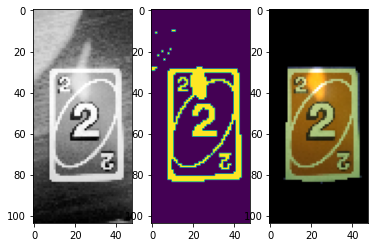

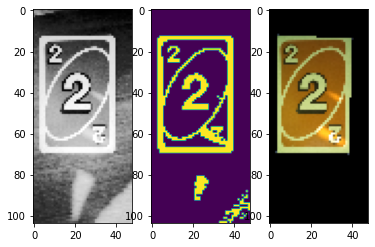

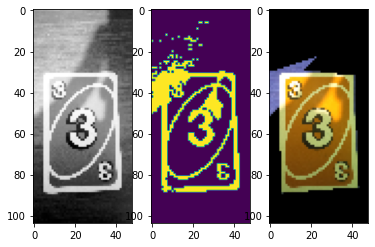

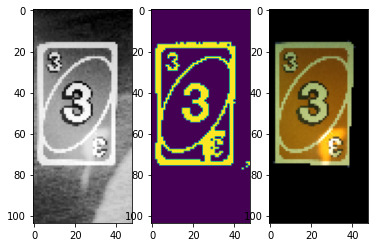

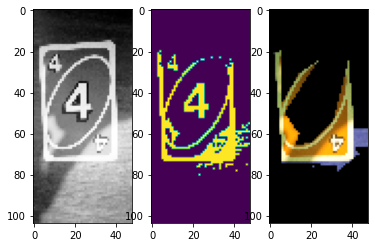

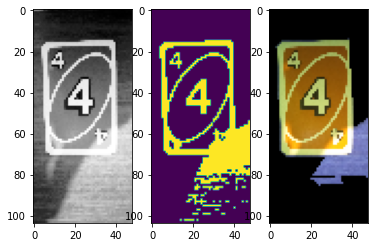

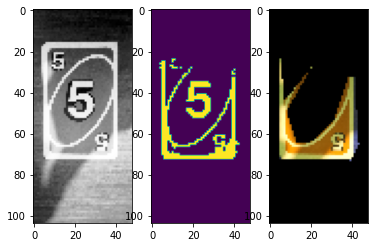

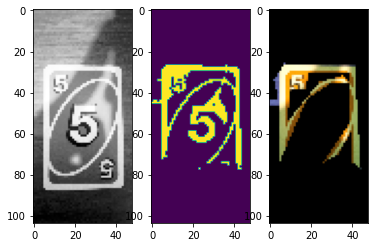

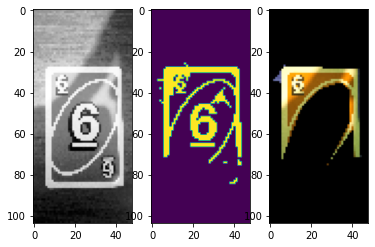

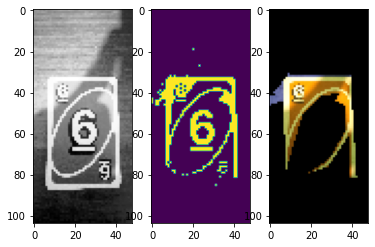

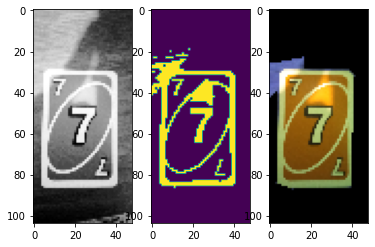

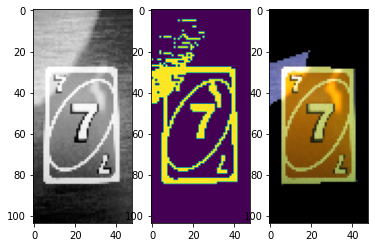

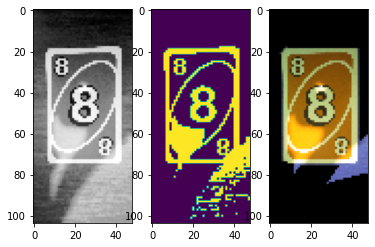

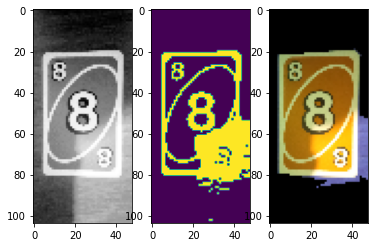

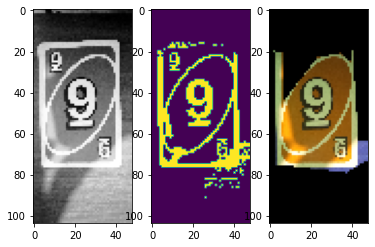

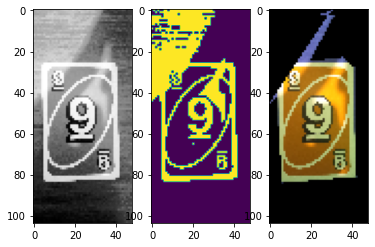

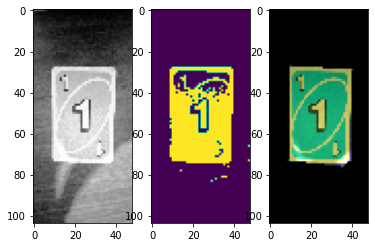

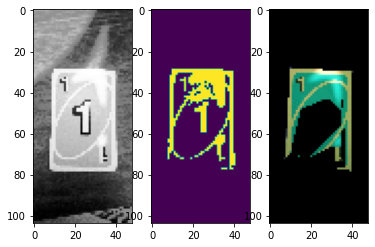

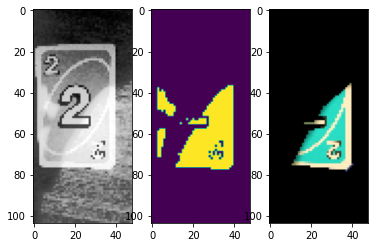

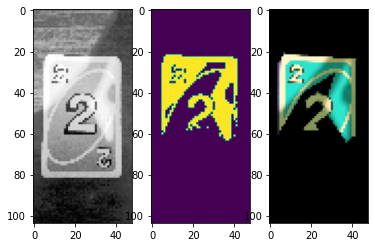

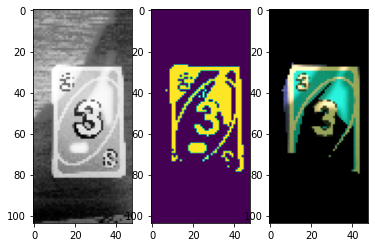

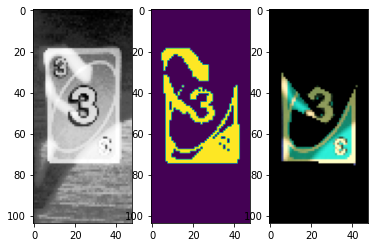

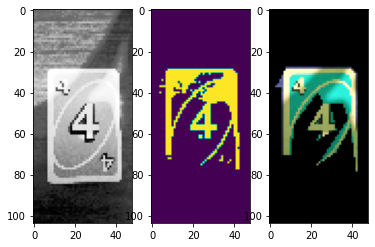

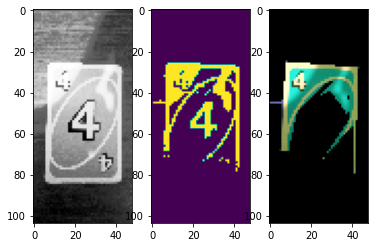

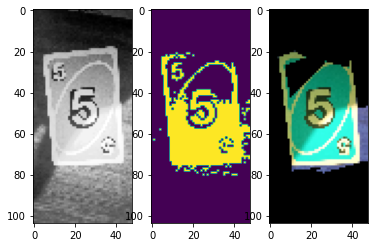

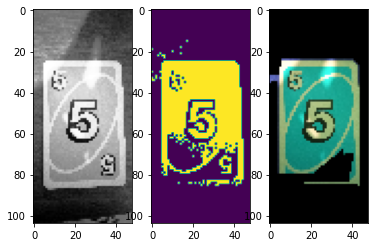

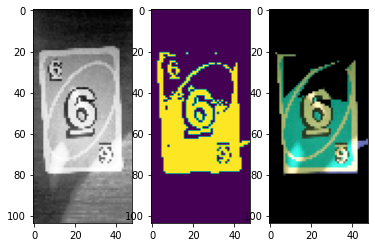

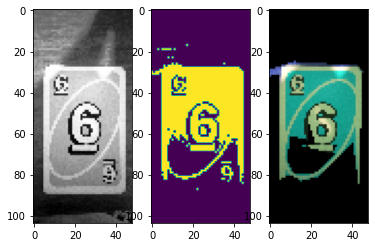

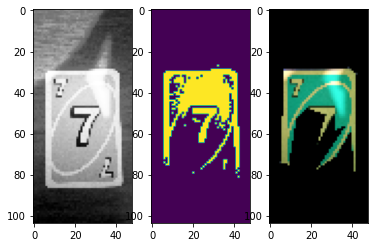

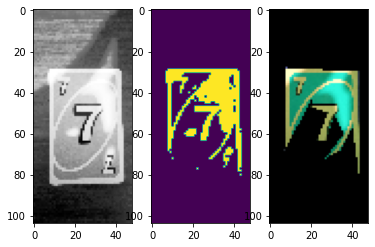

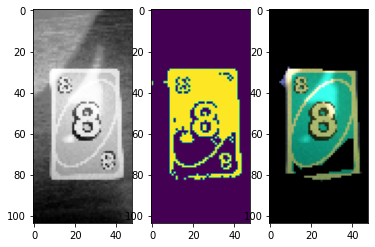

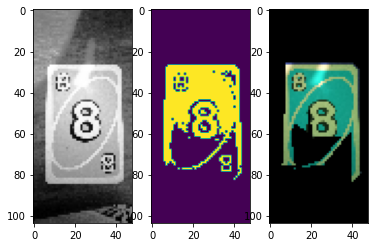

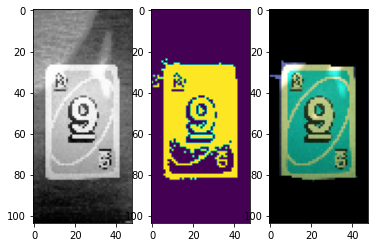

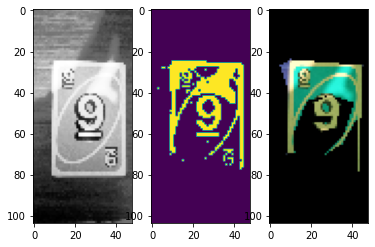

In [ ]:
from skimage.filters import threshold_local,threshold_isodata
from skimage.exposure import equalize_hist
from skimage.draw import polygon
from skimage.util import img_as_float
from cv2 import cvtColor
import numpy as np
import time

for img_num in range(data.shape[0]):
  img=data[img_num,:,:,:].astype('uint8')
  imgG=cvtColor(img,cv2.COLOR_BGR2GRAY)/255
  imgEq=equalize_hist(imgG)
  # binarizada2=imgG > threshold_local(imgEq, 15, 'mean')
  binarizada2=imgG > threshold_isodata(imgEq)

  contornos=find_contours(binarizada2, 0)
  area=0
  for contour in contornos:
    coords = approximate_polygon(contour, tolerance=2.5)
    rr, cc = polygon(coords[:, 0], coords[:, 1])
    poligono=np.zeros_like(imgG)
    poligono[rr, cc] = 1
    area_new=np.count_nonzero(poligono)
    if area_new>area:
      area=area_new
      mask=poligono
  mask=np.dstack([mask]*3)
  resp=mask*img_as_float(img)
  
  plt.close()
  plt.subplot(131)
  plt.imshow(imgEq,cmap='gray')
  plt.subplot(132)
  plt.imshow(binarizada2)
  plt.subplot(133)
  plt.imshow(resp)
  plt.show()

  # time.sleep(2)